In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [3]:
# the same as Garrett's data
df = pd.read_csv("./report_4_clean.csv")


<ipython-input-3-059d81b9bd17>:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./report_4_clean.csv")


# Crashes Initial Daily Distribution

Firstly, we examine the hourly distribution of crashes. The polar plot indicates that crashes occur most frequently around 8 a.m. and between 12 p.m. and 6 p.m., with a pronounced peak from 3 p.m. to 5 p.m. 8 a.m. and peak time generally correspond to commuting hours, when traffic volume increases as people travel to and from work or school. This pattern suggests that higher roadway activity during rush hours may contribute to the elevated crash frequency. Next, we can further investigate whether this distribution exhibits a repeating daily pattern.

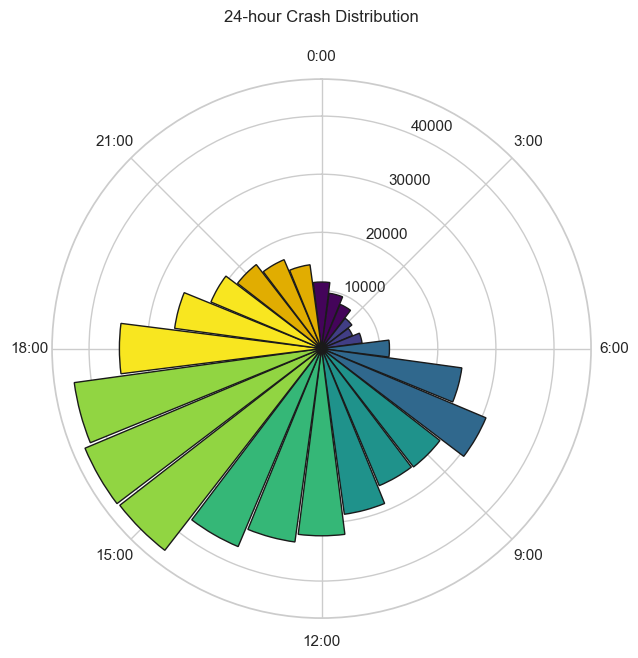

In [54]:
# --- Base data ---
hourly_counts = df['HOUR'].value_counts().sort_index()

angles = np.linspace(0, 2*np.pi, 24, endpoint=False)
values = hourly_counts.values

# --- No.017 color palette ---
no17_palette = ["#44045A", "#413E85", "#30688D", "#1F928B", "#35B777", "#91D542", "#F8E620", "#E1AD01"]

# assign color by 3-hour group
colors = [no17_palette[i // 3] for i in range(24)]

# --- Plot ---
fig, ax = plt.subplots(figsize=(7,7), subplot_kw={'projection':'polar'})
bars = ax.bar(angles, values, width=0.25, color=colors, edgecolor='k')

ax.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))
ax.set_xticklabels([f'{h}:00' for h in range(0, 24, 3)])

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

plt.title('24-hour Crash Distribution', pad=20)
plt.show()


We next explore the weekly data, as we predict that crashes may differ significantly between weekdays and weekends because of the presence or absence of commuting demands. The line plot clearly shows noticeable differences even without formal statistical tests.

On weekdays, crash frequency reaches a smaller peak around 8 a.m. and a bigger one between 4 p.m. and 5 p.m., corresponding to typical morning and evening rush hours. The crash line plots exhibit sharp increases and decreases, reflecting the concentrated traffic flow during commuting periods.

In contrast, the weekend pattern appears smoother. It gradually rising from around 6 a.m. and reaches a peak between 2 p.m. and 4 p.m. Overall, the average number of crashes on weekends is lower than that on weekdays.

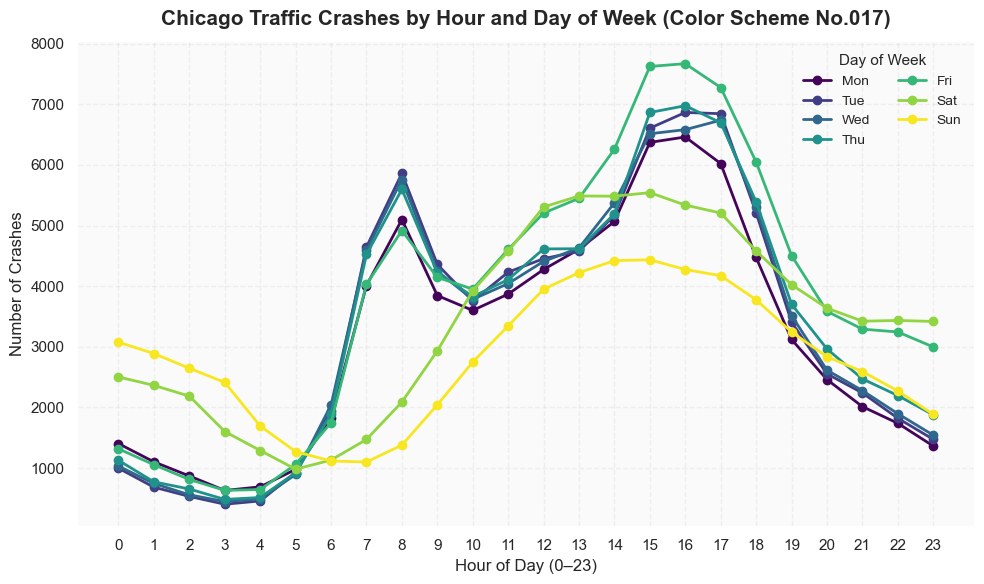

In [38]:
# Weekly

# No.017 
no017_palette = ["#44045A", "#413E85", "#30688D", "#1F928B", "#35B777", "#91D542", "#F8E620"]

sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#fafafa"})
plt.figure(figsize=(10, 6))

day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

for i, dow in enumerate(pivot.columns):
    plt.plot(
        pivot.index, pivot[dow],
        marker='o', linewidth=2,
        color=no017_palette[i],
        label=day_labels[dow - 1]
    )

plt.title("Chicago Traffic Crashes by Hour and Day of Week (Color Scheme No.017)",
          fontsize=15, weight='bold', pad=12)
plt.xlabel("Hour of Day (0–23)", fontsize=12)
plt.ylabel("Number of Crashes", fontsize=12)
plt.xticks(range(0, 24))
plt.legend(title="Day of Week", title_fontsize=11, fontsize=10,
           ncol=2, frameon=False, loc='upper right')
plt.grid(alpha=0.25, linestyle='--')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


Finally, we can check the crash type to explore the reason of peak time. The dominant crash types during peak hours are rear-end, sideswipe same direction, and turning. These findings indicates that congestion and directional conflicts are the main contributors to peak-time accidents.

Besides, we also examine the frequency of crash types throughout the day on both weekdays and weekends. The bar plots show similar patterns to those observed in the peak hours, and the dominant causes of crashes remain same.

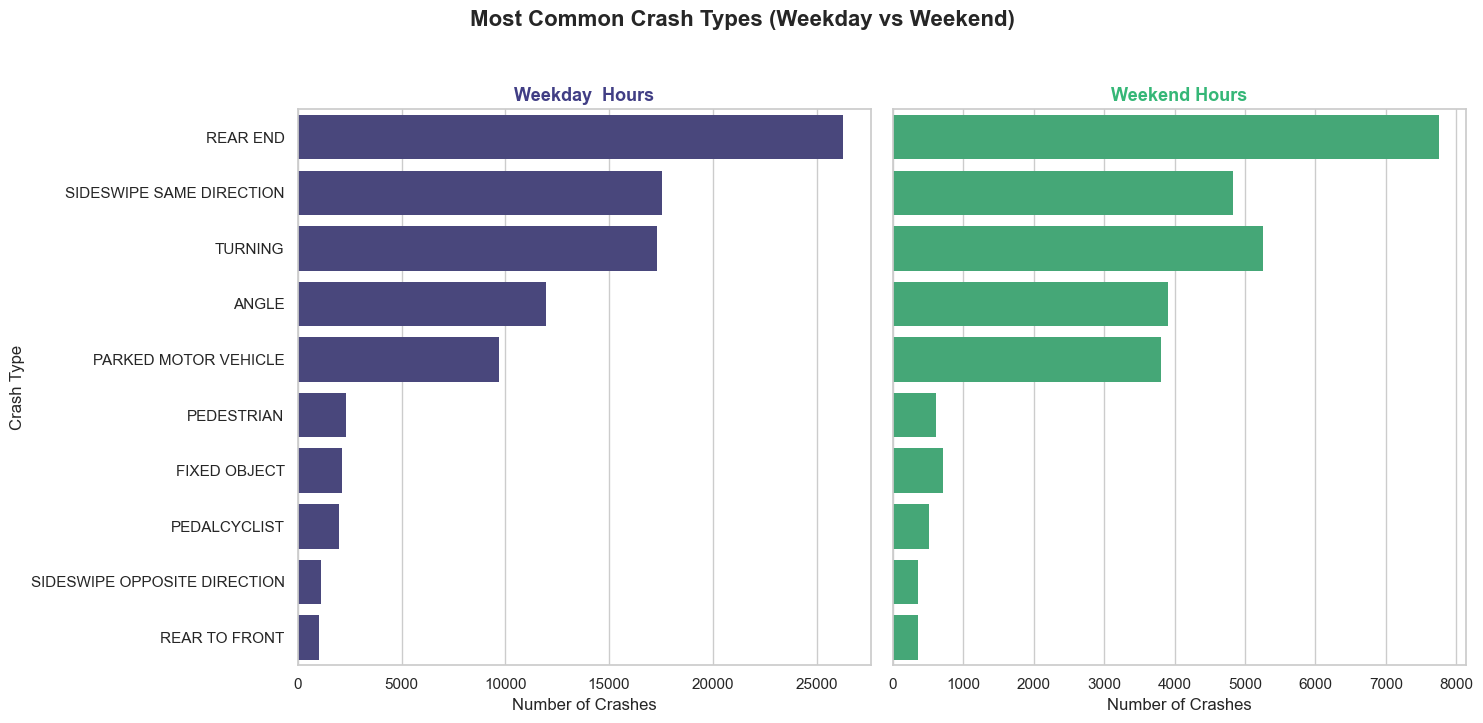

In [68]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], errors='coerce', infer_datetime_format=True)
df['HOUR'] = df['CRASH_DATE'].dt.hour
df['DAY_OF_WEEK'] = df['CRASH_DATE'].dt.dayofweek + 1  # Monday=1, Sunday=7

peak_weekends  = df[(df['HOUR'].isin([14,15,16])) & (df['DAY_OF_WEEK'].isin([6,7]))]
peak_weekdays = df[(df['HOUR'].isin([8,16,17])) & (df['DAY_OF_WEEK'].isin([1,2,3,4,5]))]

crash_type_weekends = (
    peak_weekends['FIRST_CRASH_TYPE']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'FIRST_CRASH_TYPE', 'FIRST_CRASH_TYPE': 'COUNT'})
)

crash_type_weekdays = (
    peak_weekdays['FIRST_CRASH_TYPE']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'FIRST_CRASH_TYPE', 'FIRST_CRASH_TYPE': 'COUNT'})
)

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

color_weekday = "#413E85"   
color_weekend = "#35B777"  

sns.barplot(
    data=crash_type_weekdays.head(10),
    y='FIRST_CRASH_TYPE',
    x='COUNT',
    ax=axes[0],
    color=color_weekday,
    edgecolor='none'
)
axes[0].set_title('Weekday  Hours', fontsize=13, weight='bold', color=color_weekday)
axes[0].set_xlabel('Number of Crashes')
axes[0].set_ylabel('Crash Type')

sns.barplot(
    data=crash_type_weekends.head(10),
    y='FIRST_CRASH_TYPE',
    x='COUNT',
    ax=axes[1],
    color=color_weekend,
    edgecolor='none'
)
axes[1].set_title('Weekend Hours', fontsize=13, weight='bold', color=color_weekend)
axes[1].set_xlabel('Number of Crashes')
axes[1].set_ylabel('')

plt.suptitle('Most Common Crash Types (Weekday vs Weekend)',
             fontsize=16, weight='bold', y=1.03)
plt.tight_layout()
plt.show()


# patterns shifts since 2015


## hourly distribution pattern

<ipython-input-71-611e0a36579c>:15: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  hour_year['PERCENT'] = hour_year.groupby('YEAR')['COUNT'].apply(lambda x: x / x.sum() * 100)


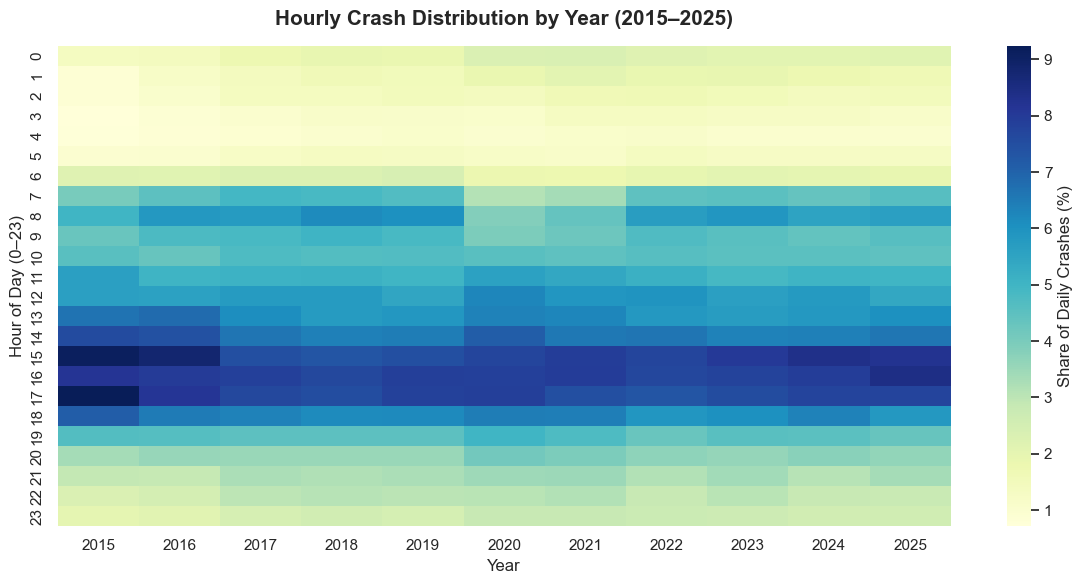

In [71]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], errors='coerce')
df['HOUR'] = df['CRASH_DATE'].dt.hour
df['YEAR'] = df['CRASH_DATE'].dt.year

hour_year = (
    df[df['YEAR'] >= 2015]
    .groupby(['YEAR', 'HOUR'])
    .size()
    .reset_index(name='COUNT')
)
hour_year['PERCENT'] = hour_year.groupby('YEAR')['COUNT'].apply(lambda x: x / x.sum() * 100)

pivot = hour_year.pivot(index='HOUR', columns='YEAR', values='PERCENT')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap="YlGnBu", cbar_kws={'label': 'Share of Daily Crashes (%)'})
plt.title("Hourly Crash Distribution by Year (2015–2025)", fontsize=15, weight='bold', pad=15)
plt.xlabel("Year")
plt.ylabel("Hour of Day (0–23)")
plt.tight_layout()
plt.show()


## primary cause pattern

In this part, we first compute the annual percentiles of each primary contributory cause, followed by averaging them over the past decade to choose the top 5 dominant causes. They are Failing to Reduce Speed to Avoid a Crash, Failing to Yield Right-of-Way, Following Too Closely, Improper Backing, and Improper Overtaking/Passing.

Then, we fit the Mixed Linear Model to see whether share of major crash causes shifts from 2015 to 2025.
By treating year as a continuous predictor, the model estimates the annual rate of change in cause proportions and tests whether these changes are statistically significant. This provides a rigorous measure of long-term shifts rather than relying on descriptive comparisons alone.

Besides, this model also introduces the random effects to account for repeated yearly observations within each crash cause and heterogeneity(different cause occupies different percentiles) in baseline prevalence.

In [6]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], errors='coerce')
df = df.dropna(subset=['CRASH_DATE'])
df['YEAR'] = df['CRASH_DATE'].dt.year

df = df[df['YEAR'] >= 2015]

df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].str.strip().str.upper()
exclude = ['UNABLE TO DETERMINE', 'NOT APPLICABLE', 'OTHER']
df = df[~df['PRIM_CONTRIBUTORY_CAUSE'].isin(exclude)]

In [7]:
cause_year = (
    df.groupby(['YEAR', 'PRIM_CONTRIBUTORY_CAUSE'])
      .size()
      .reset_index(name='COUNT')
)

cause_year['PERCENT'] = (
    cause_year.groupby('YEAR')['COUNT']
    .transform(lambda x: x / x.sum() * 100)
)


In [8]:
top5 = (
    cause_year.groupby('PRIM_CONTRIBUTORY_CAUSE')['PERCENT']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)
cause_top5 = cause_year[cause_year['PRIM_CONTRIBUTORY_CAUSE'].isin(top5)]


In [9]:
cause_top5['PRIM_CONTRIBUTORY_CAUSE'].unique()


array(['FAILING TO REDUCE SPEED TO AVOID CRASH',
       'FAILING TO YIELD RIGHT-OF-WAY', 'FOLLOWING TOO CLOSELY',
       'IMPROPER BACKING', 'IMPROPER OVERTAKING/PASSING'], dtype=object)

<ipython-input-10-61cc3cb20506>:8: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.lineplot(data=cause_top5, x='YEAR', y='PERCENT',


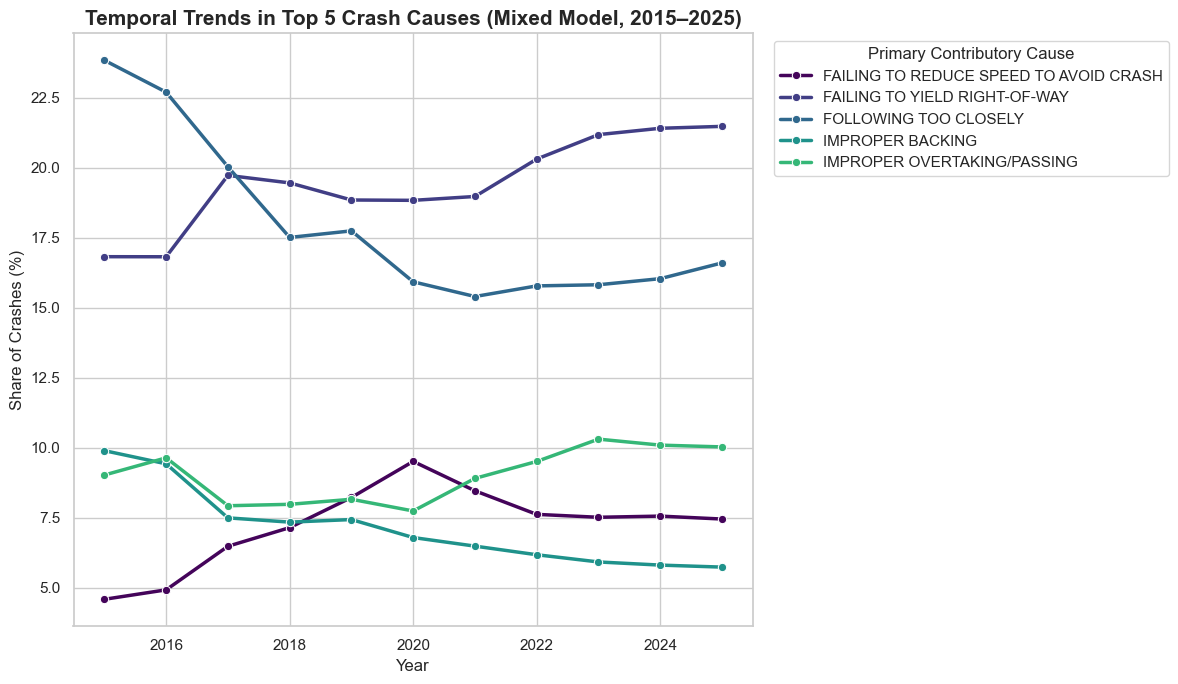

In [10]:
no017 = ["#44045A","#413E85","#30688D","#1F928B","#35B777","#91D542","#F8E620"]

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,7))
sns.lineplot(data=cause_top5, x='YEAR', y='PERCENT',
             hue='PRIM_CONTRIBUTORY_CAUSE', palette=no017,
             linewidth=2.5, marker='o')
plt.title('Temporal Trends in Top 5 Crash Causes (Mixed Model, 2015–2025)',
          fontsize=15, weight='bold')
plt.xlabel('Year')
plt.ylabel('Share of Crashes (%)')
plt.legend(title='Primary Contributory Cause', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
model_mixed2 = smf.mixedlm(
    "PERCENT ~ YEAR * PRIM_CONTRIBUTORY_CAUSE",
    data=cause_top5,
    groups=cause_top5["PRIM_CONTRIBUTORY_CAUSE"]
).fit()



/Users/sunday/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


Before analyzing the shifts or changes, we first do diagnostic checks for our model.

<ipython-input-17-690f5b061468>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cause_top5['FITTED'] = model_mixed2.fittedvalues
<ipython-input-17-690f5b061468>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cause_top5['RESID'] = model_mixed2.resid
<ipython-input-17-690f5b061468>:15: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.scatterplot(
/Users/sunday/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: col

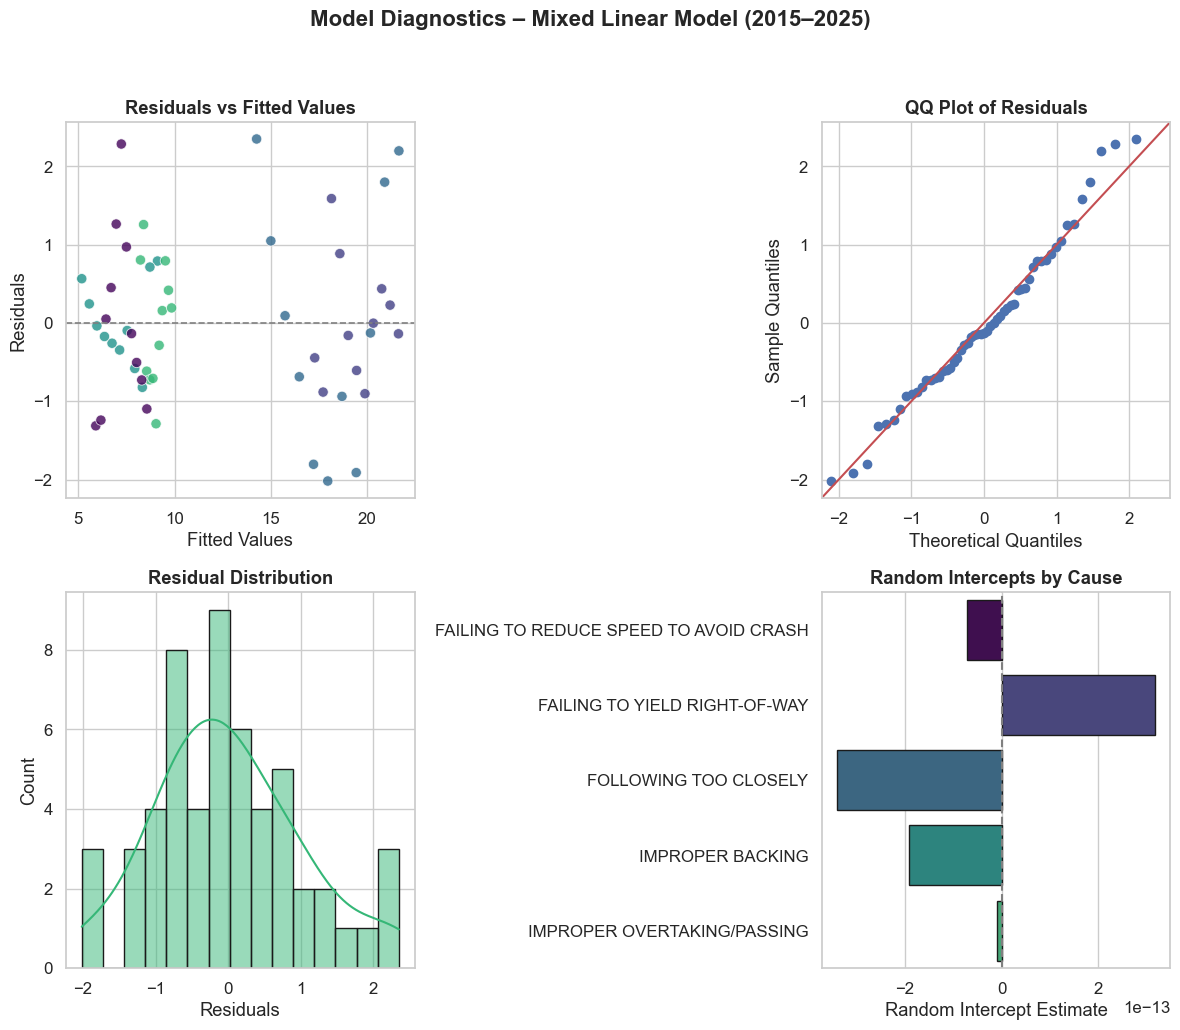

In [17]:
cause_top5['FITTED'] = model_mixed2.fittedvalues
cause_top5['RESID'] = model_mixed2.resid

ranef = model_mixed2.random_effects
ranef_df = pd.DataFrame([(k, v[0]) for k, v in ranef.items()],
                        columns=['PRIM_CONTRIBUTORY_CAUSE', 'Random_Intercept'])

# No.017 
no017 = ["#44045A","#413E85","#30688D","#1F928B","#35B777","#91D542","#F8E620"]

sns.set_theme(style="whitegrid", font_scale=1.1)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.35, wspace=0.25)

sns.scatterplot(
    data=cause_top5, x='FITTED', y='RESID',
    hue='PRIM_CONTRIBUTORY_CAUSE', palette=no017, s=55, alpha=0.8, ax=axes[0,0], legend=False
)
axes[0,0].axhline(0, color='gray', linestyle='--', lw=1.2)
axes[0,0].set_title("Residuals vs Fitted Values", weight='bold')
axes[0,0].set_xlabel("Fitted Values")
axes[0,0].set_ylabel("Residuals")

sm.qqplot(cause_top5['RESID'], line='45', fit=True, ax=axes[0,1], color="#1F928B")
axes[0,1].set_title("QQ Plot of Residuals", weight='bold')

sns.histplot(cause_top5['RESID'], kde=True, color="#35B777", bins=15, edgecolor='k', ax=axes[1,0])
axes[1,0].set_title("Residual Distribution", weight='bold')
axes[1,0].set_xlabel("Residuals")
axes[1,0].set_ylabel("Count")

sns.barplot(data=ranef_df, x='Random_Intercept', y='PRIM_CONTRIBUTORY_CAUSE',
            palette=no017, edgecolor='k', ax=axes[1,1])
axes[1,1].axvline(0, color='gray', linestyle='--')
axes[1,1].set_title("Random Intercepts by Cause", weight='bold')
axes[1,1].set_xlabel("Random Intercept Estimate")
axes[1,1].set_ylabel("")

fig.suptitle("Model Diagnostics – Mixed Linear Model (2015–2025)", fontsize=16, weight='bold', y=1.03)
plt.tight_layout()
plt.show()


The residual–fitted plot shows no discernible nonlinear pattern, indicating linearity and homoscedasticity.

The QQ plot indicate approximate normality, validating the model’s error assumptions.

The residual distribution indicates that residuals are approximately centered and symmetric around zero, indicating a well-fitted and unbiased model.

Random intercept estimates display limited variation among crash causes, indicating that most of the explained variance arises from fixed temporal effects rather than group-level deviations.

Overall, the diagnostics confirm that the mixed model is valid and reliable. 

In [13]:
print(model_mixed2.summary())

                                    Mixed Linear Model Regression Results
Model:                                MixedLM                   Dependent Variable:                   PERCENT 
No. Observations:                     55                        Method:                               REML    
No. Groups:                           5                         Scale:                                1.2233  
Min. group size:                      11                        Log-Likelihood:                       -86.1325
Max. group size:                      11                        Converged:                            Yes     
Mean group size:                      11.0                                                                    
--------------------------------------------------------------------------------------------------------------
                                                               Coef.   Std.Err.   z    P>|z|  [0.025   0.975] 
--------------------------------------

Scale(Group variance) is 1.22, which indicates moderate heterogeneity and is captured by the random intercepts.

Significant varibles includes T.FOLLOWING TOO CLOSELY, T.IMPROPER BACKING, YEAR, YEAR:T.FOLLOWING TOO CLOSELY and  YEAR:T.IMPROPER BACKING. On average, the share of crashes(TOP5 causes result in) slightly increases by 0.27% per year. And the proportions of crashes caused by Following Too Closely and Improper Backing have significantly decreased(1.0% and 0.7% per year respectively while other causes show no significant temporal shift.
